# Import module

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset

In [535]:
df1 = pd.read_csv("collegePlace.csv")
# len(df1)
df1.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Analysis on Column

In [522]:
# df1.Age.unique()
# df1.Gender.unique()
# array(['Male', 'Female'], dtype=object)

# how many stream
# df1.Stream.unique()
# array(['Electronics And Communication', 'Computer Science',
#        'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
#       dtype=object)

# no of intership
# df1.Internships.unique()
# array([1, 0, 2, 3], dtype=int64)

# total cgpa
# df1.CGPA.unique()
# array([8, 7, 6, 9, 5], dtype=int64

# tale hostel or not
# df1.Hostel.unique()
# array([1, 0], dtype=int64)

# no o backlog
# df1.HistoryOfBacklogs.unique()
# array([1, 0], dtype=int64)

# Placed or not
df1.PlacedOrNot.unique()
# array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

# Analysis through graph

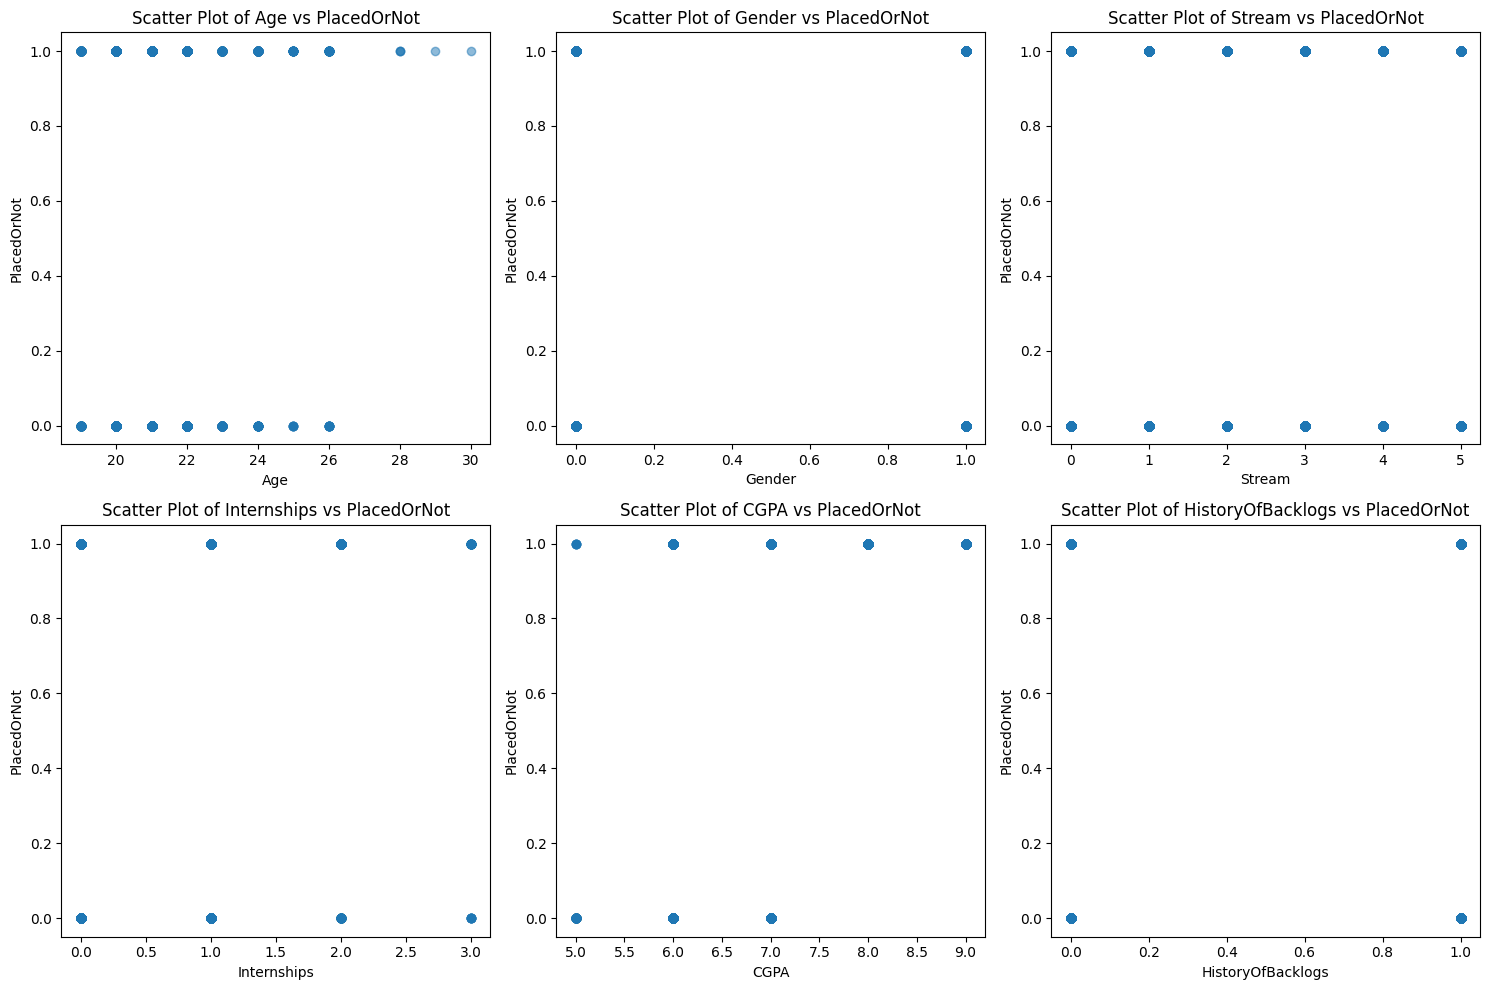

In [541]:
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame

# List of fields (excluding the 'PlacedOrNot' label)
fields = ['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs']

# Create subplots with a grid layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

# Loop through each field and create scatter plot
for i, field in enumerate(fields):
    axs[i].scatter(df2[field], df2['PlacedOrNot'], alpha=0.5)
    axs[i].set_xlabel(field)
    axs[i].set_ylabel('PlacedOrNot')
    axs[i].set_title(f'Scatter Plot of {field} vs PlacedOrNot')

# Hide empty subplots if the number of fields is less than the number of subplots
for j in range(len(fields), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# drop unused column and cleaning

In [523]:
# df2 = df1.drop(columns=['Hostel'])

# df2.isnull().sum()
# df2.duplicated().sum()

# df2.describe()

# df2.info()

# Assuming df is your DataFrame
# duplicated_rows = df2.duplicated()

# Now, you can inspect the duplicated rows
# duplicated_rows.sample(10)

# duplicated_rows = df2[df2.duplicated()]
# duplicated_rows

# Duplicate in especific column
duplicated_rows_in_column = df2[df2.duplicated(subset=['CGPA'])]
duplicated_rows_in_column

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
3,21,0,2,0,8,1,1
4,22,0,3,0,8,0,1
5,22,0,0,0,6,0,0
6,21,0,1,0,7,1,0
7,21,0,2,1,7,0,0
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


# Apply preprocessing using OneHot Encoding

In [524]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # Sample DataFrame for demonstration (Replace this with your actual df2)
# # df2 = pd.DataFrame({'Gender': ['Male', 'Female', 'Female', 'Male']})

# # Initialize the OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)

# # Fit and transform the 'Gender' column
# gender_encoded = ohe.fit_transform(df2[['Gender']])
# # gender_encoded

# # ohe.get_feature_names_out(['Gender'])
# # Convert the encoded array back to a DataFrame
# gender_encoded_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))
# # gender_encoded_df

# # # Drop the original 'Gender' column and concatenate the new one-hot-encoded columns
# df3 = df2.drop(columns=['Gender']).join(gender_encoded_df)
# # df3 = pd.concat([df2, gender_encoded_df], axis=1)
# # # Output the final DataFrame
# df3

df2['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df3 = df2
df3


,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,1
3,21,0,2,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


In [525]:

# # Initialize the OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)

# # Fit and transform the 'Stream' column
# stream_encoded = ohe.fit_transform(df3[['Stream']])

# # Convert the encoded array back to a DataFrame
# stream_encoded_df = pd.DataFrame(stream_encoded, columns=ohe.get_feature_names_out(['Stream']))

# # Drop the original 'Stream' column and concatenate the new one-hot-encoded columns
# df4 = df3.drop(columns=['Stream']).join(stream_encoded_df)

# # Output the final DataFrame
# df4

df3['Stream'].replace({
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Information Technology': 2,
    'Mechanical': 3,
    'Electrical': 4,
    'Civil': 5
}, inplace=True)
df4 = df3
df4

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,1
3,21,0,2,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


# skleran module for train test split

In [526]:
from sklearn.model_selection import train_test_split

# Assuming df2 is your DataFrame and 'PlacedOrNot' is the column name of your PlacedOrNot variable
X = df4.drop(columns=['PlacedOrNot'])
y = df4['PlacedOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)


In [527]:
X_train.head()
# len(X_train)

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
2045,19,0,1,0,6,0
1769,21,0,0,2,7,0
1268,21,0,0,0,8,0
2565,21,1,1,1,6,0
2142,22,1,1,0,9,0


In [528]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

reg = DecisionTreeClassifier()
# reg = SVC()

# reg = RandomForestClassifier()


model = reg.fit(X_train, y_train)


In [529]:
model.score(X_test,y_test)

0.8787878787878788

In [530]:
# Predict on the testing set
y_pred = reg.predict(X_test)
y_pred
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [531]:
import joblib

joblib.dump(model,'placementPredictionModel')

['placementPredictionModel']

In [532]:
ml = joblib.load('placementPredictionModel')

ml.score(X_test,y_test)

0.8787878787878788

In [533]:
new_data_point = {
    'Age': 19,
    'Gender': 1,
    'Stream': 1,
    'Internships': 0,
    'CGPA': 9,
    'HistoryOfBacklogs': 0
}

# Convert the single data point into a DataFrame
new_data_point_df = pd.DataFrame([new_data_point])

# Predict the outcome for the single data point
prediction = model.predict(new_data_point_df)

# Output the prediction
print("Placed" if prediction[0] == 1 else "Unplaced")


Placed
